In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# !pip install faster-whisper
# !pip install gradio
# !pip install googletrans==4.0.0-rc1
# !pip install --upgrade tensorflow

In [61]:
# from faster_whisper import WhisperModel

# stt_model = WhisperModel("large-v3")

In [62]:
# # stt를 실행하는 함수
# def stt_func(filepath):

#   transcripts = []

#   segments, info = stt_model.transcribe(filepath, language="ko")
#   tmp = ""
#   for segment in segments:
#     tmp = tmp + segment.text
#     transcripts.append(tmp)

#   return transcripts

In [63]:
# record = []
# def trans_audio(filepath):
#     segments, info = stt_model.transcribe(filepath, language="en", task = "transcribe")
#     tmp = ""
#     for segment in segments:
#         tmp = tmp + segment.text
#         record.append(tmp)
#     return tmp

# import gradio as gr
# import time

# def recording():
#   output_1 = gr.Textbox(label="Speech to Text")

#   gr.Interface(
#     title = 'OpenAI Whisper ASR Gradio Web UI',
#     fn = trans_audio,
#     inputs=[gr.Audio(type="filepath")],
#     outputs = [output_1],
#     live=True).launch()

In [64]:
# from googletrans import Translator
# def translate_file(input_file_path, output_file_path, src_lang='ko', dest_lang='en'):
#     # 번역기 초기화
#     translator = Translator()

#     # 입력 파일 읽기
#     with open(input_file_path, 'r', encoding='utf-8') as file:
#         korean_text = file.read()

#     # 한국어 텍스트를 영어로 번역
#     translation = translator.translate(korean_text, src=src_lang, dest=dest_lang)
#     english_text = translation.text

#     # 번역된 텍스트를 출력 파일로 저장
#     with open(output_file_path, 'w', encoding='utf-8') as file:
#         file.write(english_text)

데이터 전처리 단계

In [65]:
import plotly.express as px

# 데이터 시각화 함수
def plot_num_posts_by_type(title, tdf):
    type_posts = tdf.groupby('type').posts.count().sort_values(ascending=False).reset_index()
    fig = px.bar(type_posts, x='type', y='posts', title= title,)
    fig.update_layout(title=dict(x=0.5))
    fig.update_layout(xaxis_title='MBTI Type', yaxis_title='Count')
    fig.show()

In [77]:
import pandas as pd

# CSV 파일 로드
data1 = pd.read_csv('/content/drive/MyDrive/MBTI 500.csv')
data2 = pd.read_csv('/content/drive/MyDrive/mbti_1.csv')

df = pd.concat([data1, data2], ignore_index=True)

# 시각화
plot_num_posts_by_type("전체 mbti 데이터 분포", df)

In [67]:
df.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [68]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# NLTK의 불용어
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

불용어 개수 : 179
{'their', 'an', 'off', 'how', 'a', 'ours', 'yours', 'between', 've', 'your', 'when', 'nor', 'don', "you've", 'into', 'what', 'mustn', 'o', 'shan', 'himself', 'itself', 'whom', 'hers', 'as', 'there', 'under', 'then', 'didn', 'are', 'he', 'on', 'some', "haven't", 'll', 'be', 'had', 'shouldn', 'can', 'wouldn', 'than', 'theirs', 'and', 'ourselves', 'me', 'below', 'she', 'those', 'y', 'weren', "shan't", "it's", 'them', 'we', 'won', "hasn't", 'has', 'where', 'were', 'by', 'did', 'm', "you'll", 'aren', "don't", 'does', 'our', 'ain', 'its', "aren't", 'the', 'ma', 'his', 'doesn', 's', "didn't", 'mightn', "wasn't", 'through', "wouldn't", 'been', 'for', 'to', "needn't", "that'll", 'isn', 'once', 'my', 'they', 'against', 'is', 'before', 'no', 'most', 'during', 'these', "hadn't", 'here', 'i', "won't", 'out', 'wasn', 'should', 'this', 'so', "she's", "shouldn't", 'if', 'yourselves', 'that', 'again', "couldn't", 'it', 'only', 'or', 'will', "you're", 'herself', "should've", 'doing', 'hasn'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# 전처리 함수에서 사용할 contractions 생성
contractions = {"'cause": 'because',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "ain't": 'is not',
 "aren't": 'are not',
 "can't": 'cannot',
 "could've": 'could have',
 "couldn't": 'could not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'll": 'he will',
 "he's": 'he is',
 "here's": 'here is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how is',
 "i'd": 'i would',
 "i'd've": 'i would have',
 "i'll": 'i will',
 "i'll've": 'i will have',
 "i'm": 'i am',
 "i've": 'i have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'd've": 'it would have',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "it's": 'it is',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'must not',
 "mustn't've": 'must not have',
 "needn't": 'need not',
 "needn't've": 'need not have',
 "o'clock": 'of the clock',
 "oughtn't": 'ought not',
 "oughtn't've": 'ought not have',
 "sha'n't": 'shall not',
 "shan't": 'shall not',
 "shan't've": 'shall not have',
 "she'd": 'she would',
 "she'd've": 'she would have',
 "she'll": 'she will',
 "she'll've": 'she will have',
 "she's": 'she is',
 "should've": 'should have',
 "shouldn't": 'should not',
 "shouldn't've": 'should not have',
 "so's": 'so as',
 "so've": 'so have',
 "that'd": 'that would',
 "that'd've": 'that would have',
 "that's": 'that is',
 "there'd": 'there would',
 "there'd've": 'there would have',
 "there's": 'there is',
 "they'd": 'they would',
 "they'd've": 'they would have',
 "they'll": 'they will',
 "they'll've": 'they will have',
 "they're": 'they are',
 "they've": 'they have',
 "this's": 'this is',
 "to've": 'to have',
 "wasn't": 'was not',
 "we'd": 'we would',
 "we'd've": 'we would have',
 "we'll": 'we will',
 "we'll've": 'we will have',
 "we're": 'we are',
 "we've": 'we have',
 "weren't": 'were not',
 "what'll": 'what will',
 "what'll've": 'what will have',
 "what're": 'what are',
 "what's": 'what is',
 "what've": 'what have',
 "when's": 'when is',
 "when've": 'when have',
 "where'd": 'where did',
 "where's": 'where is',
 "where've": 'where have',
 "who'll": 'who will',
 "who'll've": 'who will have',
 "who's": 'who is',
 "who've": 'who have',
 "why's": 'why is',
 "why've": 'why have',
 "will've": 'will have',
 "won't": 'will not',
 "won't've": 'will not have',
 "would've": 'would have',
 "wouldn't": 'would not',
 "wouldn't've": 'would not have',
 "y'all": 'you all',
 "y'all'd": 'you all would',
 "y'all'd've": 'you all would have',
 "y'all're": 'you all are',
 "y'all've": 'you all have',
 "you'd": 'you would',
 "you'd've": 'you would have',
 "you'll": 'you will',
 "you'll've": 'you will have',
 "you're": 'you are',
 "you've": 'you have'}

In [78]:
import re
from bs4 import BeautifulSoup

# 전처리 함수
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = re.sub(r'https?:\/\/.*?[\s+]', '', sentence) # Links 제거
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열  제거 Ex) my friend(yugyeong) -> my friend
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) yugyeong's -> yugyeong
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm  -> umm

    pers_types = ['infp' ,'infj', 'intp', 'intj', 'istp', 'isfp', 'isfj','istp', 'entp', 'enfp', 'entj', 'enfj', 'estp', 'esfp' ,'esfj' ,'estj']
    for types in pers_types:
      sentence = sentence.replace(types, '')

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [79]:
# posts 열 전처리
clean_posts = []
for s in df['posts']:
    tmp = preprocess_sentence(s)
    clean_posts.append(tmp)
clean_posts[:5]

<ipython-input-78-5ae3b4824c8a>:8: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



['know tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low sweat really go

In [80]:
df['posts'] = clean_posts

In [81]:
# 기존에 T 또는 F를 포함하는 성격 유형에 대해 해당 문자로 대체
df['type'] = df['type'].replace({
    'INTJ': 'T', 'INTP': 'T', 'ENTJ': 'T', 'ENTP': 'T',
    'ISTJ': 'T', 'ISTP': 'T', 'ESTJ': 'T', 'ESTP': 'T',
    'INFJ': 'F', 'INFP': 'F', 'ENFJ': 'F', 'ENFP': 'F',
    'ISFJ': 'F', 'ISFP': 'F', 'ESFJ': 'F', 'ESFP': 'F'
})

In [84]:
# 완전히 삭제된 행 제거
df = df.drop(22928)

In [85]:
print(df)

                                                    posts type
0       know tool use interaction people excuse antiso...    T
1       rap music ehh opp yeah know valid well know fa...    T
2       preferably hd low except wew lad video mind go...    T
3       drink like wish could drink red wine give head...    T
4       space program ah bad deal meing freelance max ...    T
...                                                   ...  ...
114737  always think cats fi doms reason websites beco...    F
114738  thread already exists someplace else list film...    F
114739  many questions things would take purple pill p...    T
114740  conflicted right comes wanting children honest...    F
114741  long since personalitycafe although seem chang...    F

[114741 rows x 2 columns]


In [86]:
def just_split(group, chunk_size=1):
    # 타입이 같은 경우에만 중복 제거
    if len(group['type'].unique()) == 1:
        # 모든 포스트를 하나의 문자열로 결합하고 단어로 분할
        all_words = ' '.join(group['posts']).split()
        # 100개씩 단어 나누기
        chunks = [' '.join(all_words[i:i + chunk_size]) for i in range(0, len(all_words), chunk_size)]
    else:
        # 타입이 다른 경우에는 중복 제거하지 않고 그대로 사용
        chunks = [' '.join(group['posts'])]
    # 새로운 데이터프레임 생성
    return pd.DataFrame({'posts': chunks, 'type': group['type'].iloc[0]})

non_unique_df = pd.concat([just_split(group) for _, group in df.groupby('type')]).reset_index(drop=True)

print(non_unique_df)

              posts type
0              like    F
1            spring    F
2              feel    F
3         energetic    F
4            season    F
...             ...  ...
56338505     belief    T
56338506   internet    T
56338507     police    T
56338508   restrain    T
56338509   trolling    T

[56338510 rows x 2 columns]


In [87]:
print(non_unique_df['type'].value_counts())

type
T    35888128
F    20450382
Name: count, dtype: int64


In [88]:
plot_num_posts_by_type("전체 데이터 분포", non_unique_df)

In [89]:
# ############# 중복을 제거하는 코드
def remove_duplicates_and_split(group, chunk_size=1):
    # 타입이 같은 경우에만 중복 제거
    if len(group['type'].unique()) == 1:
        # 모든 포스트를 하나의 문자열로 결합하고 단어로 분할
        all_words = ' '.join(group['posts']).split()
        # 중복 단어 제거
        unique_words = list(dict.fromkeys(all_words))  # 순서를 유지하면서 중복 제거
        chunks = [' '.join(unique_words[i:i + chunk_size]) for i in range(0, len(unique_words), chunk_size)]
    else:
        # 타입이 다른 경우에는 중복 제거하지 않고 그대로 사용
        chunks = [' '.join(group['posts'])]
    # 새로운 데이터프레임 생성
    return pd.DataFrame({'posts': chunks, 'type': group['type'].iloc[0]})

unique_df = pd.concat([remove_duplicates_and_split(group) for _, group in df.groupby('type')]).reset_index(drop=True)

print(unique_df)

             posts type
0             like    F
1           spring    F
2             feel    F
3        energetic    F
4           season    F
...            ...  ...
354280   denounces    T
354281      welded    T
354282      satans    T
354283  witticisms    T
354284     staffed    T

[354285 rows x 2 columns]


In [90]:
# 중복을 제거한 단어의 수(tf에 같은 단어 있을 수 있음)
print(unique_df.count())
print(unique_df['type'].value_counts())

posts    354285
type     354285
dtype: int64
type
T    216380
F    137905
Name: count, dtype: int64


In [91]:
# 시각화
plot_num_posts_by_type("중복을 제거한 데이터 분포", unique_df)

In [92]:
import collections
from collections import Counter

# collections 모듈의 Counter를 사용하여 posts 열에서 중복이 많은 단어 40개 출력
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(10)

[('like', 759545),
 ('think', 640000),
 ('people', 596396),
 ('get', 560461),
 ('make', 419988),
 ('thing', 419029),
 ('know', 412179),
 ('one', 402060),
 ('feel', 394004),
 ('would', 379785)]

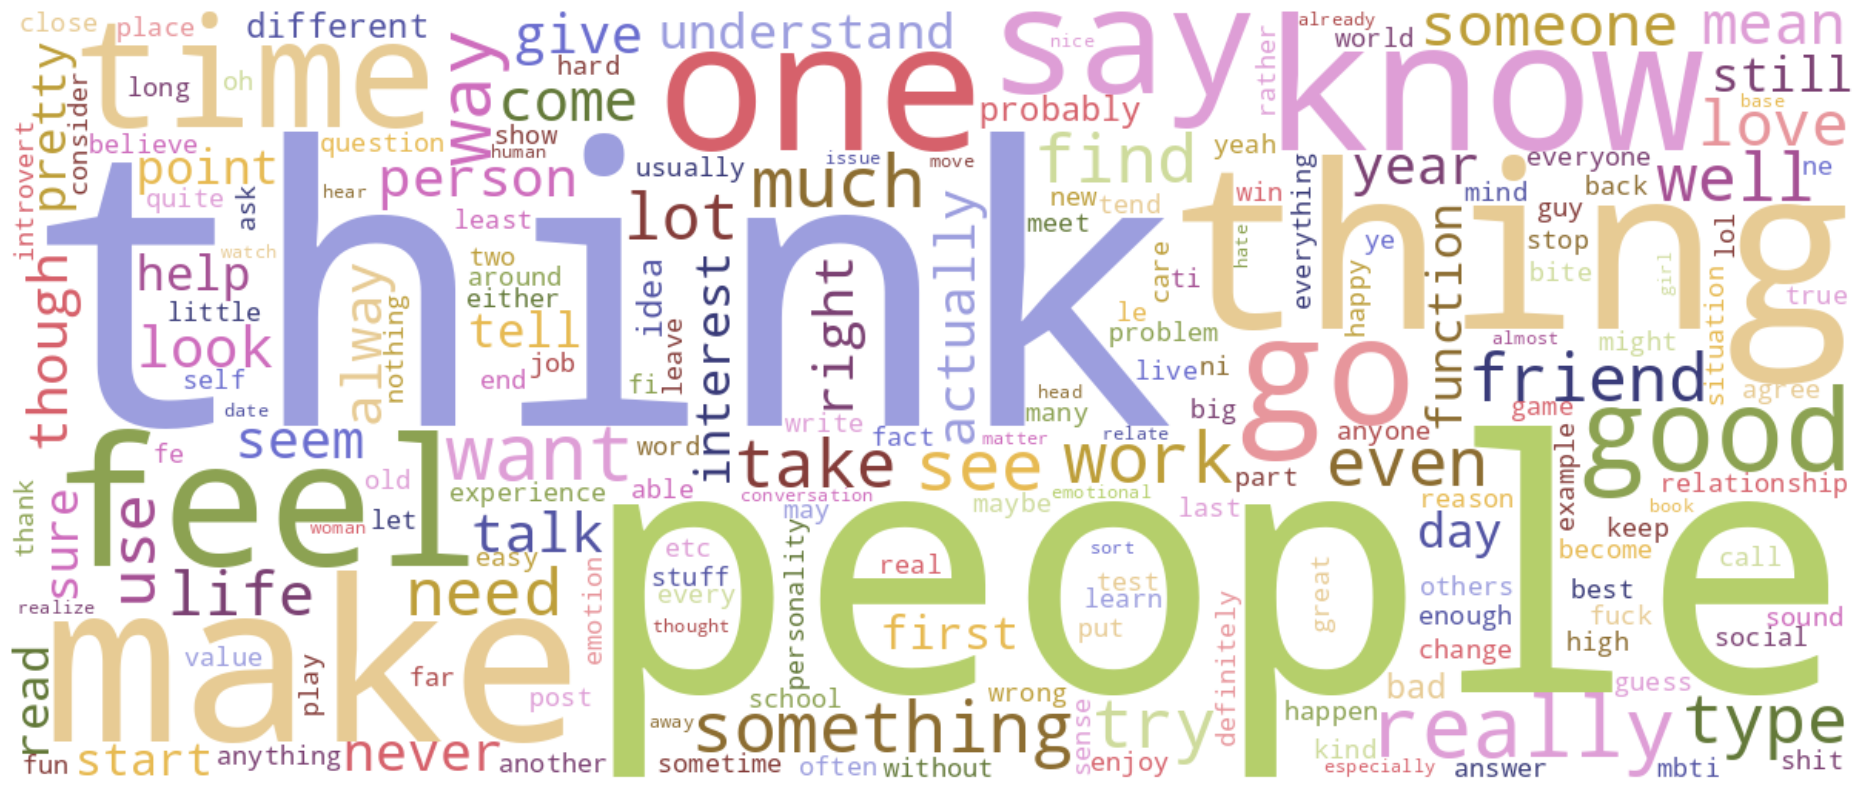

In [93]:
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(words))

plt.figure(figsize=(25,10))
# word cloud 생성
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

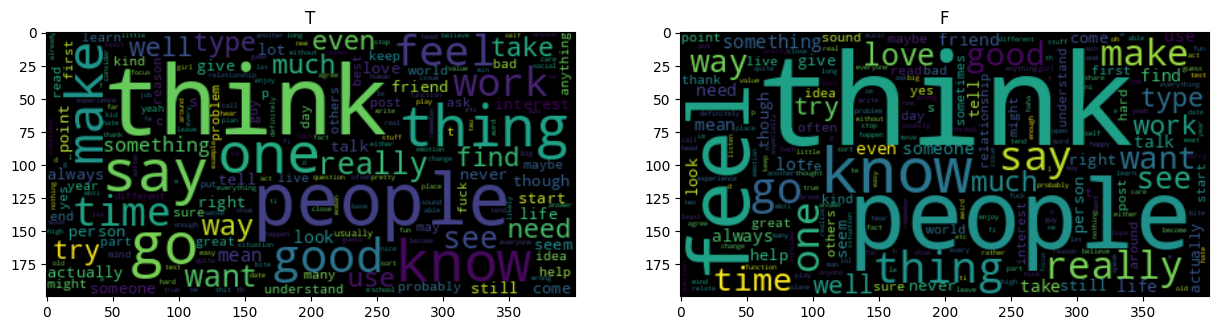

In [94]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
k = 0
for i in df['type'].unique():
    tmp = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628, relative_scaling=1, normalize_plurals=False).generate(tmp['posts'].to_string())
    ax[k].imshow(wordcloud, interpolation='bilinear')
    ax[k].set_title(i)
    ax[k].axis("on")
    k += 1
plt.show()

In [95]:
df.to_csv('data_merge.csv', index=False)

In [96]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = df

# SMOTE를 사용하기 위해서 예측 변수, 설명 변수 모두 인코딩
encoder_X = OneHotEncoder()
encoded_X = encoder_X.fit_transform(data['posts'].to_numpy().reshape(-1, 1))
encoder_y = LabelEncoder()
encoded_y = encoder_y.fit_transform(data['type'].to_numpy().reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [97]:
import sklearn
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(encoded_X, encoded_y)

In [98]:
# 인코딩한 변수들을 다시 문자열로 디코딩하는 함수 정의
def text_inverse_transform_X(encoded_data, encoder):
    decoded_data = encoder.inverse_transform(encoded_data)
    return decoded_data

def text_inverse_transform_y(encoded_data, encoder):
    decoded_data = encoder.inverse_transform(encoded_data)
    return decoded_data

# 예측 변수, 설명 변수 디코딩
X_data = text_inverse_transform_X(X_resampled, encoder_X)
y_data = text_inverse_transform_y(y_resampled, encoder_y)

In [99]:
Counter(y_data)

Counter({'T': 73183, 'F': 73183})

In [100]:
data = pd.DataFrame(X_data, columns=['posts'])
data['type'] = y_data
print(data)

                                                    posts type
0       know tool use interaction people excuse antiso...    T
1       rap music ehh opp yeah know valid well know fa...    T
2       preferably hd low except wew lad video mind go...    T
3       drink like wish could drink red wine give head...    T
4       space program ah bad deal meing freelance max ...    T
...                                                   ...  ...
146361  see list mbti type know play instrument violin...    F
146362  first past post honest misa ability bring ligh...    F
146363  physical contact deprivation legitimate tortur...    F
146364  much good match thank yaaaaay also male litera...    F
146365  disney discussion alright personally never fin...    F

[146366 rows x 2 columns]


In [101]:
plot_num_posts_by_type("SMOTE 데이터 분포", data)

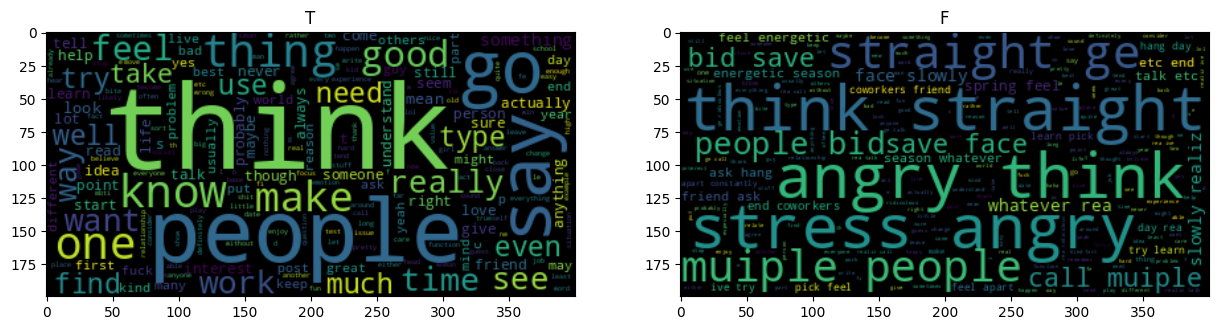

In [102]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
k = 0
for i in data['type'].unique():
    tmp = data[data['type'] == i]
    wordcloud = WordCloud(max_words=1628, relative_scaling=1, normalize_plurals=False).generate(tmp['posts'].to_string())
    ax[k].imshow(wordcloud, interpolation='bilinear')
    ax[k].set_title(i)
    ax[k].axis("on")
    k += 1
plt.show()

In [103]:
data.to_csv('smote.csv', index=False)